In [1]:
import pandas as pd
import numpy as np
import timeit

def test_solutions(*solutions, number):
    for idx, solution in enumerate(solutions):
        def timed_solution():
            solution()
            
        time = timeit.timeit(timed_solution, number=number)
        print(f"Solution {idx + 1} Time: {time:.6f} seconds")

def test_solutions_1(*solutions, df, number):
    for idx, solution in enumerate(solutions):
        def timed_solution():
            solution(df.copy())
            
        time = timeit.timeit(timed_solution, number=number)
        print(f"Solution {idx + 1} Time: {time:.6f} seconds")

def test_solutions_3(*solutions, df1, df2, number):
    for idx, solution in enumerate(solutions):
        def timed_solution():
            solution(df1.copy(), df2.copy())
            
        time = timeit.timeit(timed_solution, number=number)
        print(f"Solution {idx + 1} Time: {time:.6f} seconds")

In [2]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
display(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 1. Write a Pandas program to read a csv file from a specified source and print the first 5 rows.

In [3]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### 2. Write a Pandas program to read a dataset from diamonds DataFrame and modify the default columns values and print the first 6 rows.

In [7]:
diamonds = pd.read_csv('data/diamonds.csv', header=0, names=['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z'])
display(diamonds.head(6))

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


##### 3. Write a Pandas program to select a series from diamonds DataFrame. Print the content of the series.

In [8]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds['cut'].head(6))

0        Ideal
1      Premium
2         Good
3      Premium
4         Good
5    Very Good
Name: cut, dtype: object

##### 4. Write a Pandas program to create a new 'Quality -color' Series (use bracket notation to define the Series name) of the diamonds DataFrame.

In [12]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds['Quality-color'] = diamonds['cut'] + '-' + diamonds['color']
diamonds.head(6)

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal-E
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good-E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Very Good-J


##### 5. Write a Pandas program to find the number of rows and columns and data type of each column of diamonds Dataframe.

In [15]:
diamonds = pd.read_csv('data/diamonds.csv')
print(f'Rows: {diamonds.shape[0]}')
print(f'\nColumns: {diamonds.shape[1]}')
print(f'\nTypes: \n{diamonds.dtypes}')

Rows: 53940

Columns: 10

Types: 
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


##### 6. Write a Pandas program to summarize only 'object' columns of the diamonds Dataframe.

In [25]:
diamonds = pd.read_csv('data/diamonds.csv')
columns = diamonds.dtypes[diamonds.dtypes == 'object'].index
display(diamonds[columns])

display(diamonds.describe(include='object'))

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


##### 7. Write a Pandas program to rename two of the columns of the diamonds Dataframe.

In [30]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.rename({'carat': 'CARAT', 'cut': 'CUT'}, axis=1, inplace=True)
diamonds.rename(columns={'color': 'COLOR', 'clarity': 'CLARITY'}, inplace=True)
display(diamonds.head())

,CARAT,CUT,COLOR,CLARITY,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### 8. Write a Pandas program to rename all the columns of the diamonds Dataframe.

In [32]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.columns = ['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z']
display(diamonds)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 9. Write a Pandas program to remove the second column of the diamonds Dataframe.

In [37]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.drop(columns=diamonds.columns[1], inplace=True)
display(diamonds)

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 10. Write a Pandas program to remove multiple columns at once of the diamonds Dataframe.

In [39]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.drop(columns=['x', 'y', 'z'], inplace=True)
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


##### 11. Write a Pandas program to remove multiple rows at once (axis=0 refers to rows) from diamonds dataframe.

In [40]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.drop([0, 2, 4, 6, 8, 10], inplace=True)
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


##### 12. Write a Pandas program to sort the 'cut' Series in ascending order (returns a Series) of diamonds Dataframe.

In [41]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds['cut'].sort_values(ascending=True))

3850          Fair
51464         Fair
51466         Fair
10237         Fair
10760         Fair
           ...    
7402     Very Good
43101    Very Good
16893    Very Good
16898    Very Good
21164    Very Good
Name: cut, Length: 53940, dtype: object

##### 13. Write a Pandas program to sort the 'price' Series in descending order (returns a Series) of diamonds Dataframe.

In [42]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds['price'].sort_values(ascending=False))

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
4          335
3          334
2          327
1          326
0          326
Name: price, Length: 53940, dtype: int64

##### 14. Write a Pandas program to sort the entire diamonds DataFrame by the 'carat' Series in ascending and descending order.

In [43]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds.sort_values('price', ascending=True))
print()
display(diamonds.sort_values('price', ascending=False))

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
...,...,...,...,...,...,...,...,...,...,...
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


##### 15. Write a Pandas program to filter the DataFrame rows to only show carat weight at least 0.3.

In [44]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds[diamonds['carat'] > .3])

,carat,cut,color,clarity,depth,table,price,x,y,z
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
23,0.31,Very Good,J,SI1,59.4,62.0,353,4.39,4.43,2.62
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 16. Write a Pandas program to convert a python list to pandas series.

In [45]:
sr = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sr

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

##### 17. Write a Pandas program to find the details of the diamonds where length>5, width>5 and depth>5.

In [47]:
diamonds = pd.read_csv('data/diamonds.csv')

result = diamonds[
    (diamonds['x'] > 5) &
    (diamonds['y'] > 5) &
    (diamonds['z'] > 5)
]

display(result)

,carat,cut,color,clarity,depth,table,price,x,y,z
11778,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13562,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
...,...,...,...,...,...,...,...,...,...,...
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


##### 18. Write a Pandas program to find the diamonds that are either Premium or Ideal.

In [49]:
diamonds = pd.read_csv('data/diamonds.csv')

result = diamonds[
    diamonds['cut'].isin(['Premium', 'Ideal'])
]

display(result)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
...,...,...,...,...,...,...,...,...,...,...
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 19. Write a Pandas program to find the diamonds that are with a Fair or Good or Premium.

In [50]:
diamonds = pd.read_csv('data/diamonds.csv')

result = diamonds[
    diamonds['cut'].isin(['Fair', 'Good', 'Premium'])
]

display(result)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
...,...,...,...,...,...,...,...,...,...,...
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


##### 20. Write a Pandas program to display all column labels of diamonds DataFrame.

In [51]:
diamonds = pd.read_csv('data/diamonds.csv')
print(diamonds.columns.values)

['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']


##### 21. Write a Pandas program to read only a subset of 3 rows from diamonds DataFrame.

In [53]:
diamonds = pd.read_csv('data/diamonds.csv', nrows=3)
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31


##### 22. Write a Pandas program to iterate through diamonds DataFrame.

In [58]:
diamonds = pd.read_csv('data/diamonds.csv')
for idx, row in diamonds.iloc[:5].iterrows():
    print(idx, row.carat, row.cut, row.color, row.clarity, row.depth)

0 0.23 Ideal E SI2 61.5
1 0.21 Premium E SI1 59.8
2 0.23 Good E VS1 56.9
3 0.29 Premium I VS2 62.4
4 0.31 Good J SI2 63.3


##### 23. Write a Pandas program to drop all non-numeric columns from diamonds DataFrame.

In [69]:
from pandas.api.types import is_numeric_dtype

diamonds = pd.read_csv('data/diamonds.csv')
dtypes = diamonds.dtypes
columns = dtypes[~dtypes.apply(is_numeric_dtype)].index
display(diamonds.drop(columns=columns))

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [71]:
diamonds = pd.read_csv('data/diamonds.csv')
columns = diamonds.select_dtypes(exclude=[np.number]).dtypes.index
display(diamonds.drop(columns=columns))

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


##### 24. Write a Pandas program to include only numeric columns in the diamonds DataFrame.

In [68]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds.select_dtypes(include=[np.number]))

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


##### 25. Write a Pandas program to pass a list of data types to only describe certain types of diamonds DataFrame.

In [76]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds.select_dtypes(include=['object', 'int']))

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53935,Ideal,D,SI1,2757
53936,Good,D,SI1,2757
53937,Very Good,D,SI1,2757
53938,Premium,H,SI2,2757


##### 26. Write a Pandas program to calculate the mean of each numeric column of diamonds DataFrame.

In [81]:
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds.mean(numeric_only=True))

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

##### 27. Write a Pandas program to calculate the mean of each row of diamonds DataFrame.

In [83]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
display(diamonds.mean(axis=1, numeric_only=True).head())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


0    64.727143
1    65.292857
2    65.651429
3    66.535714
4    66.864286
dtype: float64

##### 28. Write a Pandas program to calculate the mean of price for each cut of diamonds DataFrame.

In [87]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
display(diamonds.groupby('cut')['price'].mean().reset_index())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,cut,price
0,Fair,4358.757764
1,Good,3928.864452
2,Ideal,3457.541970
3,Premium,4584.257704
4,Very Good,3981.759891


In [111]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())

bins = [0, 1, 2, 3, 4, 5, 6]
labels=['1', '2', '3', '4', '5', '6']
diamonds['carat_cat'] = pd.cut(diamonds['carat'], bins=bins, labels=labels)
display(diamonds.sample(10))

display(diamonds.groupby(['cut', 'carat_cat'])['price'].mean().reset_index())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cat
11927,1.24,Ideal,J,SI1,61.9,56.0,5125,6.95,6.88,4.28,2
48326,0.24,Ideal,F,VS1,62.0,56.0,536,3.99,3.94,2.46,1
40705,0.58,Ideal,I,SI2,61.3,56.0,1158,5.38,5.45,3.32,1
9914,1.13,Premium,H,SI1,61.2,59.0,4689,6.68,6.65,4.08,2
15847,1.01,Ideal,G,VS2,62.4,57.0,6340,6.39,6.36,3.98,2
47592,0.51,Ideal,E,VS2,60.7,56.0,1877,5.17,5.21,3.15,1
23106,1.24,Very Good,F,VVS2,62.0,55.0,11130,6.88,6.95,4.29,2
34914,0.34,Ideal,F,VS2,62.9,55.0,880,4.48,4.46,2.81,1
29204,0.33,Ideal,I,IF,61.8,55.0,694,4.46,4.47,2.76,1
25815,2.31,Very Good,J,VS2,59.7,60.0,14830,8.53,8.59,5.11,3


C:\Users\Alexander\AppData\Local\Temp\ipykernel_15932\4118350394.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(diamonds.groupby(['cut', 'carat_cat'])['price'].mean().reset_index())


,cut,carat_cat,price
0,Fair,1,2445.063608
1,Fair,2,6127.426966
2,Fair,3,11697.037383
3,Fair,4,13611.000000
4,Fair,5,17930.000000
5,Fair,6,18018.000000
6,Good,1,2113.637812
7,Good,2,6934.985826
8,Good,3,14561.175758
9,Good,4,18359.000000


##### 29. Write a Pandas program to calculate count, minimum, maximum price for each cut of diamonds DataFrame.

In [114]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
display(diamonds.groupby('cut').agg(count=('cut', 'count'), min_price=('price', 'min'), max_price=('price', 'max')))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,count,min_price,max_price
cut,,,
Fair,1610,337,18574
Good,4906,327,18788
Ideal,21551,326,18806
Premium,13791,326,18823
Very Good,12082,336,18818


##### 30. Write a Pandas program to create a side-by-side bar plot of the diamonds DataFrame.

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='cut'>

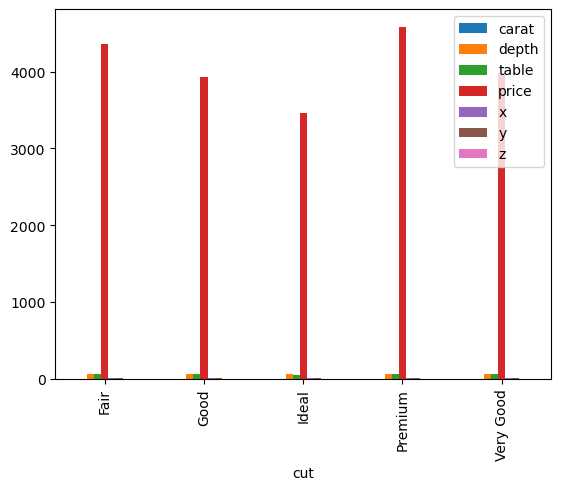

In [115]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
diamonds.groupby('cut').mean(numeric_only=True).plot(kind='bar')

##### 31. Write a Pandas program to count how many times each value in cut series of diamonds DataFrame occurs.

In [13]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
display(diamonds.groupby('cut')['cut'].count())
display(diamonds.groupby('cut').agg({'cut': 'count'}))
display(diamonds['cut'].value_counts())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

,cut
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

##### 32. Write a Pandas program to display percentages of each value of cut series occurs in diamonds DataFrame.

In [14]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
display(diamonds['cut'].value_counts(normalize=True))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

##### 33. Write a Pandas program to display the unique values in cut series of diamonds DataFrame.

In [16]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
display(diamonds.cut.unique())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

##### 34. Write a Pandas program to count the number of unique values in cut series of diamonds DataFrame.

In [22]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
print(f'Count of unique values in cut series: {diamonds.cut.nunique()}')

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



Count of unique values in cut series: 5


##### 35. Write a Pandas program to compute a cross-tabulation of two Series in diamonds DataFrame.

In [23]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
display(pd.crosstab(diamonds.cut, diamonds.color))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


##### 36. Write a Pandas program to calculate various summary statistics of cut series of diamonds DataFrame.

In [24]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
diamonds.cut.describe()

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [25]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
diamonds.carat.describe()

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

##### 37. Write a Pandas program to create a histogram of the 'carat' Series (distribution of a numerical variable) of diamonds DataFrame.

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: ylabel='Frequency'>

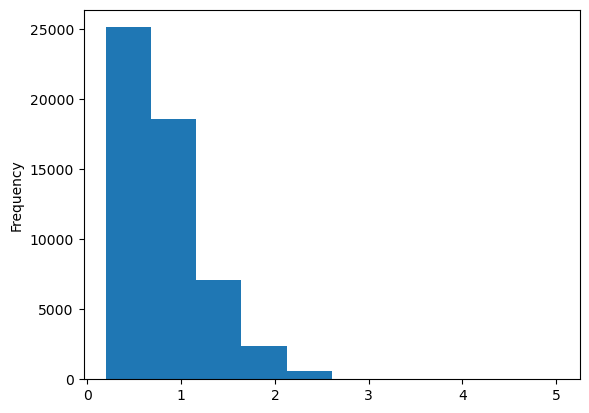

In [26]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
diamonds.carat.plot(kind='hist')

##### 38. Write a Pandas program to create a bar plot of the 'value_counts' for the 'cut' series of diamonds DataFrame.

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='cut'>

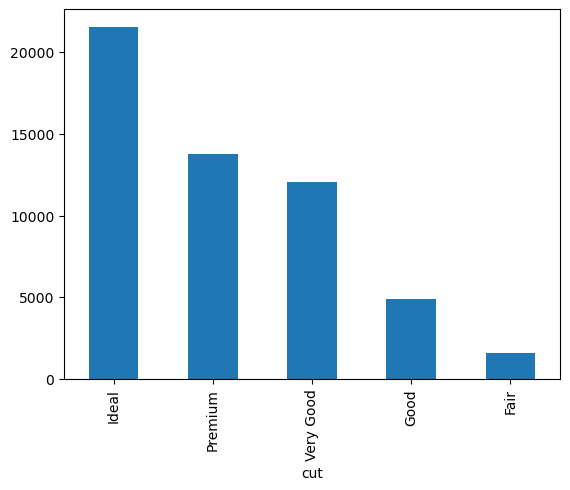

In [27]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
diamonds.cut.value_counts().plot(kind='bar')

##### 39. Write a Pandas program to create a DataFrame of booleans (True if missing, False if not missing) from diamonds DataFrame.

In [28]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
display(diamonds.isna())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


##### 40. Write a Pandas program to count the number of missing values in each Series of diamonds DataFrame.

In [30]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()
display(diamonds.isnull().sum())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##### 41. Write a Pandas program to check the number of rows and columns and drop those row if 'any' values are missing in a row of diamonds DataFrame.

In [40]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print(f'\nCount of (rows, columns): {diamonds.shape}')
print()
display(diamonds[~diamonds.isnull().any(axis=1)])

display(diamonds.dropna(how='any'))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



Count of (rows, columns): (53940, 10)



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 42. Write a Pandas program to drop a row if any or all values in a row are missing of diamonds DataFrame on two specific columns.

In [42]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print(f'\nCount of (rows, columns): {diamonds.shape}')
print()

display(diamonds.dropna(how='any', subset=['cut', 'color']))
display(diamonds.dropna(how='all', subset=['cut', 'color']))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



Count of (rows, columns): (53940, 10)



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 43. Write a Pandas program to set an existing column as the index of diamonds DataFrame.

In [55]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

result = diamonds.set_index(['carat'])
display(result)
display(result.loc[0.72])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.72,Very Good,H,VVS2,60.3,56.0,2771,5.81,5.83,3.51
0.72,Very Good,G,VS2,63.7,56.4,2776,5.62,5.69,3.61
0.72,Ideal,G,SI1,61.8,56.0,2776,5.72,5.75,3.55
0.72,Ideal,G,SI1,60.7,56.0,2776,5.79,5.82,3.53
0.72,Good,G,VS2,59.7,60.5,2776,5.80,5.84,3.47
...,...,...,...,...,...,...,...,...,...
0.72,Ideal,G,VS1,62.6,53.0,2746,5.76,5.78,3.61
0.72,Ideal,H,VVS2,62.3,56.0,2752,5.74,5.81,3.60
0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


##### 44. Write a Pandas program to set an existing column as the index of diamonds DataFrame and restore the index name, and move the index back to a column.

In [57]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

result = diamonds.set_index(['carat'])
display(result.head())
display(result.reset_index().head())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### 45. Write a Pandas program to access a specified Series index and the Series values of diamonds DataFrame.

In [66]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.cut.values)
display(diamonds.cut.index.values)

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

array([    0,     1,     2, ..., 53937, 53938, 53939])

##### 46. Write a Pandas program to sort a Series by its values and index of diamonds DataFrame.

In [69]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.carat.sort_values(ascending=False))
print()
display(diamonds.carat.sort_index(ascending=False))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


27415    5.01
27630    4.50
27130    4.13
25999    4.01
25998    4.01
         ... 
31593    0.20
31592    0.20
31599    0.20
31597    0.20
31598    0.20
Name: carat, Length: 53940, dtype: float64

53939    0.75
53938    0.86
53937    0.70
53936    0.72
53935    0.72
         ... 
4        0.31
3        0.29
2        0.23
1        0.21
0        0.23
Name: carat, Length: 53940, dtype: float64

##### 47. Write a Pandas program to calculate the multiply of length, width and depth for each cut of diamonds DataFrame.

In [71]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

diamonds['x*y*z'] = diamonds.x * diamonds.y * diamonds.z
display(diamonds)

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z,x*y*z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


##### 48. Write a Pandas program to concatenate the diamonds DataFrame with the 'color' Series.

In [77]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

pd.concat([diamonds, diamonds.color.rename('COLOR')], axis=1)

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z,COLOR
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,E
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,E
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,I
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,J
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,D
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,D
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,D
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,H


##### 49. Write a Pandas program to read specified rows and all columns of diamonds DataFrame.

In [81]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[[1, 3, 5, 7, 9]])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


##### 50. Write a Pandas program to read rows 0, 5, 7 and all columns of diamonds DataFrame.

In [82]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[[0, 5, 7]])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


##### 51. Write a Pandas program to read rows 2 through 5 and all columns of diamonds DataFrame.

In [83]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[2:5])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### 52. Write a Pandas program to read rows 0 through 2 (inclusive), columns 'color' and 'price' of diamonds DataFrame.

In [89]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[0:3][['color', 'price']])
display(diamonds.loc[0:2, ['color', 'price']])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,color,price
0,E,326
1,E,326


,color,price
0,E,326
1,E,326
2,E,327


##### 53. Write a Pandas program to read rows 0 through 2 (inclusive), columns 'color' through 'price' (inclusive) of diamonds DataFrame.

In [93]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.loc[0:2, 'color':'price'])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,color,clarity,depth,table,price
0,E,SI2,61.5,55.0,326
1,E,SI1,59.8,61.0,326
2,E,VS1,56.9,65.0,327


##### 54. Write a Pandas program to read rows in which the 'cut' is 'Premium', column 'color' of diamonds DataFrame.

In [96]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds[diamonds.cut == 'Premium']['color'])
print()
display(diamonds.loc[diamonds.cut == 'Premium', 'color'])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


1        E
3        I
12       F
14       E
15       E
        ..
53928    E
53930    E
53931    F
53934    D
53938    H
Name: color, Length: 13791, dtype: object

1        E
3        I
12       F
14       E
15       E
        ..
53928    E
53930    E
53931    F
53934    D
53938    H
Name: color, Length: 13791, dtype: object

##### 55. Write a Pandas program to read rows in positions 0 and 1, columns in positions 0 and 3 of diamonds DataFrame.

In [98]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[[0, 1], [0, 3]])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,clarity
0,0.23,SI2
1,0.21,SI1


##### 56. Write a Pandas program to read rows in positions 0 through 4, columns in positions 1 through 4 of diamonds DataFrame.

In [99]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[0:4, 1:4])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2


##### 57. Write a Pandas program to read rows in positions 0 through 4 (exclusive) and all columns of diamonds DataFrame.

In [100]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[0:5])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### 58. Write a Pandas program to read rows 2 through 5 (inclusive), columns in positions 0 through 2 (exclusive) of diamonds DataFrame.

In [102]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.iloc[2:6, 0:2])

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut
2,0.23,Good
3,0.29,Premium
4,0.31,Good
5,0.24,Very Good


##### 59. Write a Pandas program to print a concise summary of diamonds DataFrame.

In [104]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.describe())
display(diamonds.info())

Original DataFrame:


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

##### 60. Write a Pandas program to get the true memory usage by diamonds DataFrame.

In [108]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.memory_usage(deep=True))
print()
display(diamonds.info(memory_usage='deep'))

Original DataFrame:


Index          132
carat       431520
cut        2982154
color      2697000
clarity    2811070
depth       431520
table       431520
price       431520
x           431520
y           431520
z           431520
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 11.0 MB


None

##### 61. Write a Pandas program to calculate the memory usage for each Series (in bytes) of diamonds DataFrame.

In [109]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.memory_usage(deep=True))

Original DataFrame:


Index          132
carat       431520
cut        2982154
color      2697000
clarity    2811070
depth       431520
table       431520
price       431520
x           431520
y           431520
z           431520
dtype: int64

##### 62. Write a Pandas program to get randomly sample rows from diamonds DataFrame.

In [111]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.sample(10))

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
35848,0.31,Ideal,F,VVS2,61.5,56.0,917,4.35,4.37,2.68
24265,1.83,Premium,E,SI2,62.0,57.0,12492,7.89,7.81,4.87
40990,0.42,Ideal,E,VS1,61.6,57.0,1181,4.84,4.80,2.97
33136,0.31,Premium,E,VVS2,61.3,60.0,816,4.33,4.35,2.66
12702,0.26,Very Good,E,VVS1,62.9,58.0,599,4.06,4.08,2.56
25434,1.55,Ideal,F,VS2,62.6,57.0,14185,7.35,7.39,4.61
13176,1.12,Very Good,E,SI1,58.8,61.0,5447,6.74,6.80,3.98
23619,1.41,Premium,E,VS2,62.7,56.0,11644,7.18,7.10,4.48
10300,0.90,Very Good,E,SI1,62.8,58.0,4760,6.09,6.13,3.84
28217,0.40,Premium,D,SI2,62.1,60.0,666,4.69,4.75,2.93


##### 63. Write a Pandas program to get sample 75% of the diamonds DataFrame's rows without replacement and store the remaining 25% of the rows in another DataFrame.

In [121]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds_75 = diamonds.sample(frac=.75)
diamonds_25 = diamonds.drop(index=diamonds_75.index)
print('Sample 75%')
display(diamonds_75)

print('Remaining 25%')
display(diamonds_25)

display(diamonds.loc[~diamonds.index.isin(diamonds_75.index), :])

Sample 75%


,carat,cut,color,clarity,depth,table,price,x,y,z
31061,0.27,Premium,E,VVS2,61.8,59.0,752,4.18,4.14,2.57
12767,1.14,Premium,G,SI1,62.2,58.0,5326,6.64,6.70,4.15
23188,1.06,Ideal,F,IF,61.0,57.0,11195,6.64,6.55,4.02
21115,1.04,Ideal,F,VVS2,62.2,56.0,9281,6.53,6.46,4.04
28989,0.42,Ideal,G,SI2,62.3,55.0,686,4.80,4.83,3.00
...,...,...,...,...,...,...,...,...,...,...
6194,0.90,Very Good,D,SI1,62.5,63.0,3997,6.14,6.11,3.83
45571,0.52,Ideal,E,VS2,62.2,56.0,1689,5.11,5.15,3.19
14276,1.11,Very Good,H,SI1,61.9,58.0,5780,6.63,6.65,4.11
51868,0.56,Fair,E,VVS2,57.3,60.0,2426,5.50,5.57,3.17


Remaining 25%


,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
19,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66
22,0.23,Very Good,H,VS1,61.0,57.0,353,3.94,3.96,2.41
...,...,...,...,...,...,...,...,...,...,...
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49


,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
19,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66
22,0.23,Very Good,H,VS1,61.0,57.0,353,3.94,3.96,2.41
...,...,...,...,...,...,...,...,...,...,...
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49


##### 64. Write a Pandas program to read the diamonds DataFrame and detect duplicate color.
Note: duplicated () function returns boolean Series denoting duplicate rows, optionally only considering certain columns.

In [124]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.duplicated('color'))

display(diamonds.color.value_counts())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


0        False
1         True
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Length: 53940, dtype: bool

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

##### 65. Write a Pandas program to count the duplicate rows of diamonds DataFrame.

In [126]:
diamonds = pd.read_csv('data/diamonds.csv')
print('Original DataFrame:')
display(diamonds.head())
print()

display(diamonds.duplicated().sum())

Original DataFrame:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


np.int64(146)